# Rocket Landing - Performance Analysis

In [6]:
import numpy as np
import torch
from rocket import Rocket
from policy import ActorCritic
import matplotlib.pyplot as plt
import utils
import os
import glob

In [7]:
task = 'landing' # 'hover' or 'landing'
#task = 'hover'   # 'hover' or 'landing'

max_steps = 800
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
env = Rocket(task=task, max_steps=max_steps)
ckpt_folder = os.path.join('./', task + '_ckpt')
net = ActorCritic(input_dim=env.state_dims, output_dim=env.action_dims).to(device)

if len(glob.glob(os.path.join(ckpt_folder, '*.pt'))) > 0:
    print('\n\nLoading checkpoint...')
    # load the last ckpt
    #checkpoint = torch.load(glob.glob(os.path.join(ckpt_folder, '*.pt'))[-1])
    checkpoint = torch.load(glob.glob(os.path.join(ckpt_folder, '*.pt'))[-1], weights_only=False, map_location=torch.device('cpu'))
    net.load_state_dict(checkpoint['model_G_state_dict'])
    last_episode_id = checkpoint['episode_id']
    REWARDS = checkpoint['REWARDS']

('mapping', PositionalMapping())
('linear1', Linear(in_features=120, out_features=128, bias=True))
('linear2', Linear(in_features=128, out_features=128, bias=True))
('linear3', Linear(in_features=128, out_features=128, bias=True))
('linear4', Linear(in_features=128, out_features=9, bias=True))
('relu', LeakyReLU(negative_slope=0.2))
[Linear(in_features=120, out_features=128, bias=True), Linear(in_features=128, out_features=128, bias=True), Linear(in_features=128, out_features=128, bias=True), Linear(in_features=128, out_features=9, bias=True)]
('mapping', PositionalMapping())
('linear1', Linear(in_features=120, out_features=128, bias=True))
('linear2', Linear(in_features=128, out_features=128, bias=True))
('linear3', Linear(in_features=128, out_features=128, bias=True))
('linear4', Linear(in_features=128, out_features=1, bias=True))
('relu', LeakyReLU(negative_slope=0.2))
[Linear(in_features=120, out_features=128, bias=True), Linear(in_features=128, out_features=128, bias=True), Linear

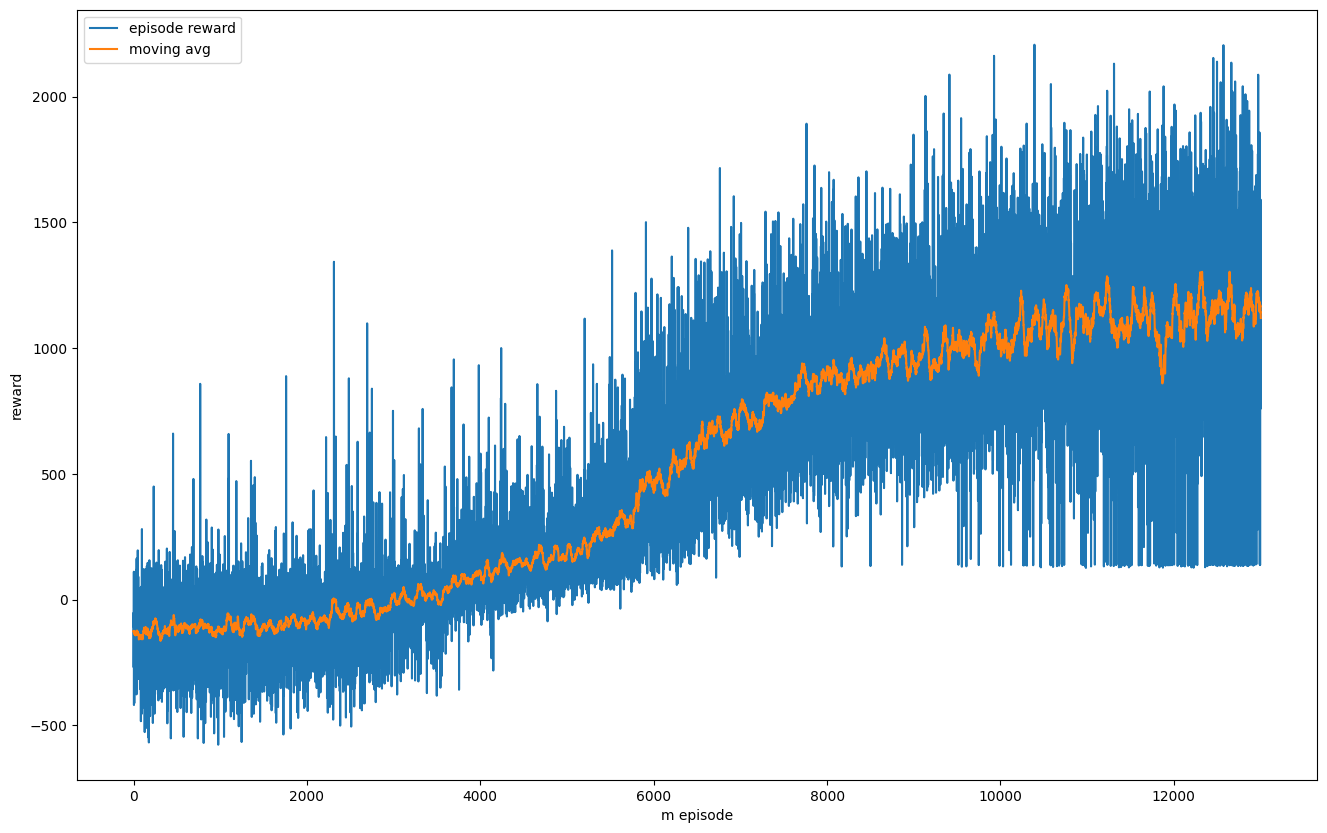

In [8]:
plt.figure(figsize=(16,10))
plt.plot(REWARDS), plt.plot(utils.moving_avg(REWARDS, N=50))
plt.legend(['episode reward', 'moving avg'], loc=2)
plt.xlabel('m episode')
plt.ylabel('reward')
# plt.savefig(os.path.join(ckpt_folder, 'rewards_' + str(episode_id).zfill(8) + '.jpg'))
plt.show()

13001 13004 108 433 (13004,) (13004,) (12572, 433) (12572,) (12572,)


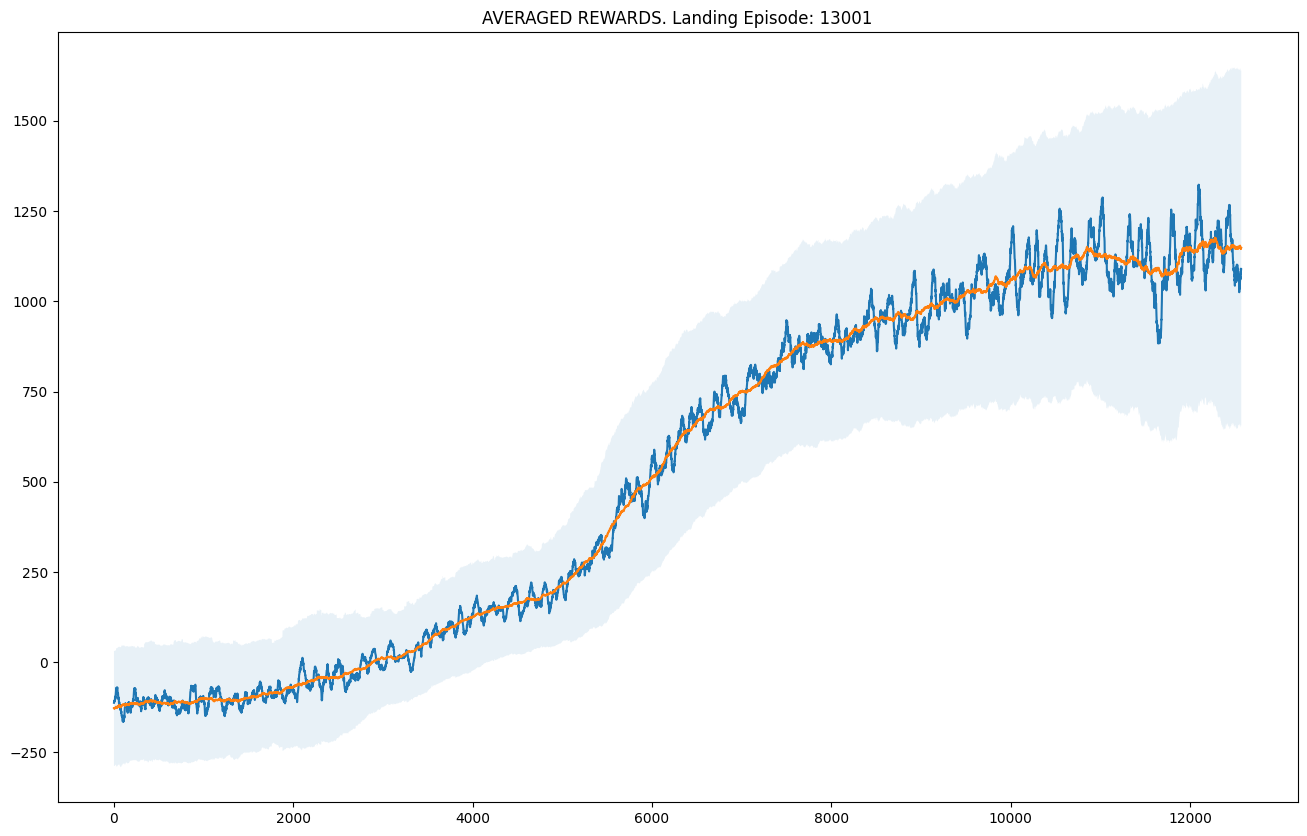

In [9]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
episode = last_episode_id
window0 = max(4, int(episode/120))#window0 = int(episode/120)
window1 = max(2, int(episode/30)) #window1 = int(episode/30)
yhat0 = savgol_filter(REWARDS, window0, min(3, window0-1))#yhat0 = savgol_filter(REWARDS, window0, 3) # window size window0, polynomial order 3
yhat1 = savgol_filter(REWARDS, window1, min(1, window1-1))#yhat1 = savgol_filter(REWARDS, window1, 1)
Aw = np.lib.stride_tricks.sliding_window_view(REWARDS, window1)
Aμ = np.mean(Aw, axis=-1)
Aσ = np.std(Aw, axis=-1)
print(episode,len(REWARDS),window0,window1,yhat0.shape,yhat1.shape,Aw.shape,Aμ.shape,Aσ.shape)

plt.figure(figsize=(16,10))
plt.plot(yhat0[window1//2:-window1//2])
# plt.plot(yhat1[window1//2:-window1//2])
plt.plot(Aμ)

plt.fill_between(range(Aμ.shape[0]),Aμ-Aσ,Aμ+Aσ,alpha=.1)
plt.title(f'AVERAGED REWARDS. {task.capitalize()} Episode: {episode}')
plt.show()

# Visualize Actor-Critic Network
https://stackoverflow.com/questions/52468956/how-do-i-visualize-a-net-in-pytorch


(process:15560): Pango-WARNING **: 23:27:13.523: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(process:5368): Pango-WARNING **: 23:27:14.176: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


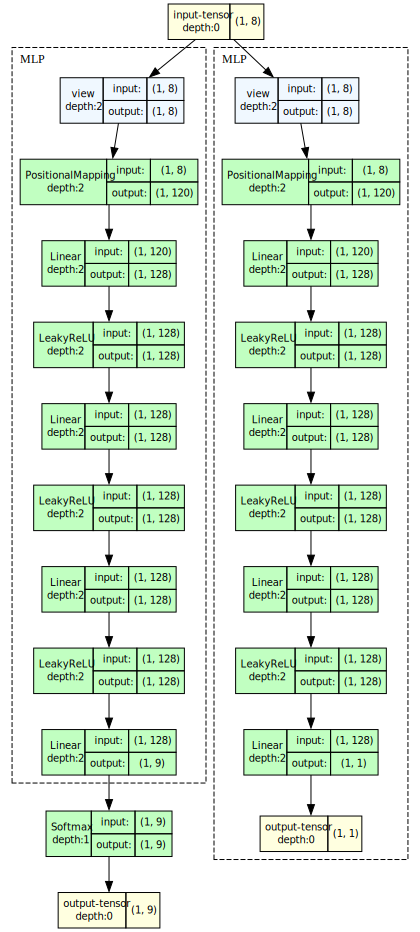

In [10]:
import torchvision
"""
torchview 0.2.6
pip install torchview
Latest version: Feb 14, 2023
Visualization of Pytorch Models
Torchview provides visualization of pytorch models in the form of visual graphs.
Visualization includes tensors, modules, torch.functions and info such as input/output shapes.
"""
from torchview import draw_graph # install graphviz and add it to PATH

model_graph = draw_graph(net, input_size=(1,env.state_dims), expand_nested=True)
model_graph.visual_graph.save("actor_critic.gv")
model_graph.visual_graph.render("actor_critic", format="png")
model_graph.visual_graph